# Project: Wrangling and Analyze Data

### Background

WeRateDogs is a twitter account that posts images of dogs along with a brief description of the animal. Users can then rate the dog by giving it a favor. They did so by asking WeRateDogs to share some of their tweets with us. They have shared more than 5000 of their tweets, some of which contain basic information. They occasionally mention the variety of the dogs in their brief laudatory, and other times they don't. Due to Udacity, however, they have employed some nonpartisan organizational techniques to arrange the dogs according to the images that are attached to the tweets.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data 
(twitter_archive_enhanced.csv)

In [1]:
# import librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


import requests
from operator import itemgetter

In [2]:
# load datasets
twitter_archived_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archived_enhanced.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# download 2nd dataset programmatically
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as f:
    f.write(response.content)

In [4]:
# load 2nd dataset
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#Loading third data programmatically as the twitter API token have expire
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

with open('tweet-json.txt', mode='wb') as f:
    f.write(response.content)
data = 'tweet-json.txt'

with open(data, 'r') as f:
    jdata = [json.loads(line) for line in f]
data = list(map(itemgetter('id','retweet_count','favorite_count'), jdata))
data[0:4]

[(892420643555336193, 8853, 39467),
 (892177421306343426, 6514, 33819),
 (891815181378084864, 4328, 25461),
 (891689557279858688, 8964, 42908)]

In [6]:
# read the json file data
df = pd.DataFrame(data, columns=['tweet_id','retweet_count','favorite_count'])
df.head(3)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461

In [7]:
#save 3rd dataset in CSV format
df.to_csv('tweet_json.csv', index=False)

## Assessing Data


## assess_'twitter-archive-data'

In [8]:
#load datasets
twitter_archived_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
tweet_fav_counts = pd.read_csv('tweet_json.csv')

# visual Assessment

For visual assessment, each dataset is gathered and imported into the Jupyter notebook.

In [9]:
twitter_archived_enhanced

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [10]:
img_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [11]:
tweet_fav_counts

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
5     891087950875897856           3261           20562
6     890971913173991426           2158           12041
7     890729181411237888          16716           56848
8     890609185150312448           4429           28226
9     890240255349198849           7711           32467
10    890006608113172480           7624           31166
11    889880896479866881           5156           28268
12    889665388333682689           8538           38818
13    889638837579907072           4735           27672
14    889531135344209921           2321           15359
15    889278841981685760           5637           25652
16    888917238123831296           4709           29611
17    888804989199671297           4559           26080
18    888554962724278272           3732           20290
19    888078434458587136           3653           22201
20    887705289381826560           5609           30779
21    887517139158093824          12082           46959
22    887473957103951883          18781           69871
23    887343217045368832          10737           34222
24    887101392804085760           6167           31061
25    886983233522544640           8084           35859
26    886736880519319552           3443           12306
27    886680336477933568           4610           22798
28    886366144734445568           3316           21524
29    886267009285017600              4             117
...                  ...            ...             ...
2324  666411507551481857            339             459
2325  666407126856765440             44             113
2326  666396247373291520             92             172
2327  666373753744588802            100             194
2328  666362758909284353            595             804
2329  666353288456101888             77             229
2330  666345417576210432            146             307
2331  666337882303524864             96             204
2332  666293911632134144            368             522
2333  666287406224695296             71             152
2334  666273097616637952             82             184
2335  666268910803644416             37             108
2336  666104133288665088           6871           14765
2337  666102155909144576             16              81
2338  666099513787052032             73             164
2339  666094000022159362             79             169
2340  666082916733198337             47             121
2341  666073100786774016            174             335
2342  666071193221509120             67             154
2343  666063827256086533            232             496
2344  666058600524156928             61             115
2345  666057090499244032            146             304
2346  666055525042405380            261             448
2347  666051853826850816            879            1253
2348  666050758794694657             60             136
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

# Programmatic Assessment

programatically assess the datasets

In [12]:
twitter_archived_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#check the column names
twitter_archived_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
#check the number of rows and columns
twitter_archived_enhanced.shape

(2356, 17)

In [15]:
twitter_archived_enhanced.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [16]:
twitter_archived_enhanced.tweet_id.duplicated().any()

False

In [17]:
twitter_archived_enhanced.sample(4)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1083  738537504001953792                    NaN                  NaN   
1561  688385280030670848                    NaN                  NaN   
1389  700167517596164096                    NaN                  NaN   
114   870656317836468226                    NaN                  NaN   

                      timestamp  \
1083  2016-06-03 01:07:16 +0000   
1561  2016-01-16 15:40:14 +0000   
1389  2016-02-18 03:58:39 +0000   
114   2017-06-02 15:00:16 +0000   

                                                 source  \
1083  <a href="http://twitter.com/download/iphone" r...   
1561  <a href="http://twitter.com/download/iphone" r...   
1389  <a href="http://twitter.com/download/iphone" r...   
114   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1083  This is Bayley. She fell asleep trying to esca...                  NaN   
1561  This is Louis. He's takes top-notch selfies. 1...                  NaN   
1389  This is Dotsy. She's stuck as hell. 10/10 http...                  NaN   
114   This is Cody. He zoomed too aggressively and t...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1083                       NaN                        NaN   
1561                       NaN                        NaN   
1389                       NaN                        NaN   
114                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1083  https://twitter.com/dog_rates/status/738537504...                11   
1561  https://twitter.com/dog_rates/status/688385280...                12   
1389  https://twitter.com/dog_rates/status/700167517...                10   
114   https://www.gofundme.com/help-fix-codys-torn-a...                13   

      rating_denominator    name doggo floofer pupper  puppo  
1083                  10  Bayley  None    None   None  puppo  
1561                  10   Louis  None    None   None   None  
1389                  10   Dotsy  None    None   None   None  
114                   10    Cody  None    None   None   None

In [18]:
twitter_archived_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
twitter_archived_enhanced.floofer.value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
twitter_archived_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
twitter_archived_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
twitter_archived_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
twitter_archived_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
twitter_archived_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
twitter_archived_enhanced.name.value_counts().index

Index(['None', 'a', 'Charlie', 'Cooper', 'Oliver', 'Lucy', 'Lola', 'Tucker',
       'Penny', 'Bo',
       ...
       'Mike', 'Ralphson', 'Filup', 'Benny', 'Genevieve', 'Georgie', 'Reptar',
       'Maks', 'Dudley', 'Steve'],
      dtype='object', length=957)

In [26]:
twitter_archived_enhanced.duplicated().sum()

0

In [27]:
# Reviewing the statistical analysis of rating_numerator and rating_denominator
twitter_archived_enhanced[['rating_numerator', 'rating_denominator']].describe()

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

In [28]:
twitter_archived_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [29]:
# all improper names begin in lower case
index = np.where(twitter_archived_enhanced.name.str.islower())
for i in index:
    print(twitter_archived_enhanced.iloc[i,12].unique())

['such' 'a' 'quite' 'not' 'one' 'incredibly' 'mad' 'an' 'very' 'just' 'my'
 'his' 'actually' 'getting' 'this' 'unacceptable' 'all' 'old' 'infuriating'
 'the' 'by' 'officially' 'life' 'light' 'space']


## image prediction datasets

In [30]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
img_predictions[img_predictions.img_num == 4].head()

tweet_id                                          jpg_url  \
144   668623201287675904  https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg   
779   689905486972461056  https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg   
1024  710588934686908417  https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg   
1161  734787690684657664  https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg   
1286  750868782890057730  https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg   

      img_num                p1   p1_conf  p1_dog                 p2  \
144         4         Chihuahua  0.708163    True         Pomeranian   
779         4        Pomeranian  0.943331    True  Shetland_sheepdog   
1024        4          Pembroke  0.982004    True           Cardigan   
1161        4  golden_retriever  0.883991    True               chow   
1286        4        toy_poodle  0.912648    True   miniature_poodle   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
144   0.091372    True                titi  0.067325   False  
779   0.023675    True                chow  0.007165    True  
1024  0.008943    True            malamute  0.007550    True  
1161  0.023542    True  Labrador_retriever  0.016056    True  
1286  0.035059    True           seat_belt  0.026376   False

In [32]:
img_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [33]:
img_predictions.shape

(2075, 12)

In [34]:
img_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [35]:
img_predictions.sample(5)


tweet_id                                          jpg_url  \
849   695629776980148225  https://pbs.twimg.com/media/Cadfl6zWcAEZqIW.jpg   
981   707377100785885184  https://pbs.twimg.com/media/CdEbt0NXIAQH3Aa.jpg   
2004  877316821321428993  https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg   
642   681339448655802368  https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg   
285   671147085991960577  https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg   

      img_num                    p1   p1_conf  p1_dog                  p2  \
849         1  Old_English_sheepdog  0.693857    True          otterhound   
981         1      golden_retriever  0.637225    True          bloodhound   
2004        1                Saluki  0.509967    True   Italian_greyhound   
642         1             seat_belt  0.532441   False  Labrador_retriever   
285         1     Yorkshire_terrier  0.467202    True               cairn   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
849   0.232117    True  West_Highland_white_terrier  0.012867    True  
981   0.094542    True               cocker_spaniel  0.069797    True  
2004  0.090497    True             golden_retriever  0.079406    True  
642   0.094615    True                       kuvasz  0.089863    True  
285   0.440122    True                silky_terrier  0.058690    True

In [36]:
img_predictions.duplicated().sum()

0

### tweets and favorite count column

In [37]:
tweet_fav_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [38]:
tweet_fav_counts.shape

(2354, 3)

In [39]:
tweet_fav_counts.tail()

tweet_id  retweet_count  favorite_count
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

In [40]:
tweet_fav_counts.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [41]:
tweet_fav_counts.describe()

tweet_id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

In [42]:
tweet_fav_counts.tweet_id.duplicated().sum()

0

### Documenting Issues Observed Throughout Assessing of the dataset

I'll list all the problems I encountered when evaluating the datasets in this section and classify them as Quality and Tidiness issues.

Note:

Quality issues are issues that affect the data's content (The missing, incorrect, inconsistent, and duplicated values)
Tidiness issues  are linked to the data's structure. 

The following are Tidiness rules:

Each observation forms a row
Each type of observational unit forms a table
Each variable forms a column

### Quality issues
1. After resolving the rating issues, rename the rating numerator column to ratings.

2. timestamp to `datetime

3. only save the original tweet

4. Change the data type from int to string

5. Delete the unnecessary column

6. Substitute improper names with No name

7. For clarity, names should be written in lowercase.

8. Make float the rating datatype.




#### img_predictions Dataset

1.  Change the data type from string to categorical

#### Tweet_Favorite_counts columns

1.  The tweet_id is int instead of string

### Tidiness issues

1. Extract the tweet's html source

2. Dogstages into a single column 

3. Combine every dataset.


## Cleaning Data


In [43]:
# Make copies of original pieces of data
twitter_archived_clean = twitter_archived_enhanced.copy()
img_predictions_clean = img_predictions.copy()
tweet_fav_clean = tweet_fav_counts.copy()

### Issue #1:

#### Define:  

After resolving the rating issues, rename the rating numerator column to ratings.

#### Code

In [44]:
#All ratings with a score of at least 10—including those with decimal points—were extracted and placed in a new rating.
twitter_archived_clean['new_rating'] = twitter_archived_clean.text.str.extract(r"(\d+\.\d+\/10|\d+\/10)")

#All ratings with a score of at least 10—including those with decimal points—were extracted and placed in a new rating.
new_rating = twitter_archived_clean['new_rating'].str.split('/', expand=True)

#setting the numerator as a rating in the twitter archive enhanced DataFrame
twitter_archived_clean['rating_numerator'] = new_rating[0]

In [45]:
#Analyze the data without rating it visually
pd.set_option('display.max_colwidth',1) #show everything in all columns
i = np.where(twitter_archived_clean['new_rating'].isnull()) #Get the list of the index of those without ratings 
twitter_archived_clean.iloc[i]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
342   832088576586297345  8.320875e+17           3.058208e+07          
433   820690176645140481 NaN                    NaN                    
516   810984652412424192 NaN                    NaN                    
902   758467244762497024 NaN                    NaN                    
1120  731156023742988288 NaN                    NaN                    
1228  713900603437621249 NaN                    NaN                    
1254  710658690886586372 NaN                    NaN                    
1274  709198395643068416 NaN                    NaN                    
1351  704054845121142784 NaN                    NaN                    
1433  697463031882764288 NaN                    NaN                    
1598  686035780142297088  6.860340e+17           4.196984e+09          
1634  684225744407494656  6.842229e+17           4.196984e+09          
1635  684222868335505415 NaN                    NaN                    
1663  682808988178739200  6.827884e+17           4.196984e+09          
1779  677716515794329600 NaN                    NaN                    
1843  675853064436391936 NaN                    NaN                    

                      timestamp  \
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
902   2016-07-28 01:00:57 +0000   
1120  2016-05-13 16:15:54 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   

                                                                                  source  \
342   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
433   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
516   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
902   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1120  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1228  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1254  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1274  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1433  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1598  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1634  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1635  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1663  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1779  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1843  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                           text  \
342   @docmisterio account started on 11/15/15                                                                                                                                    
433   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                         
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling b

In [46]:
#the tweets without ratings were found to typically not be about a specific dog.
#thus remove them as they are not required for this research.

twitter_archived_clean = twitter_archived_clean.drop(twitter_archived_clean.index[i])

#### Test

In [47]:
#confirming that the denominator is just 10 by verifying
new_rating[1].value_counts()

10    2340
Name: 1, dtype: int64

In [48]:
#confirming ratings for decimal values
twitter_archived_clean['rating_numerator'].value_counts()

12       558
11       464
10       462
13       353
9        157
8        102
14       56 
7        53 
5        35 
6        32 
3        19 
4        15 
2        9  
1        8  
420      2  
0        2  
15       2  
9.75     2  
11.27    1  
1776     1  
182      1  
666      1  
13.5     1  
9.5      1  
11.26    1  
17       1  
007      1  
Name: rating_numerator, dtype: int64

In [49]:
#confirming observations that are unrated
twitter_archived_clean['rating_numerator'].isnull().sum()

0

### Issue #2:

#### Define

timestamp to `datetime

#### Code

In [50]:
#change to datetime
twitter_archived_clean.timestamp = twitter_archived_clean.timestamp.astype('object')

In [51]:
twitter_archived_clean.timestamp.dtype

dtype('O')

#### Test

In [52]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2340 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2340 non-null object
source                        2340 non-null object
text                          2340 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2284 non-null object
rating_numerator              2340 non-null object
rating_denominator            2340 non-null int64
name                          2340 non-null object
doggo                         2340 non-null object
floofer                       2340 non-null object
pupper                        2340 non-null object
puppo                         2340 non-null object
new_rating                    2

### Issue 3

#### Define

only save the original tweet

In [53]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2340 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2340 non-null object
source                        2340 non-null object
text                          2340 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2284 non-null object
rating_numerator              2340 non-null object
rating_denominator            2340 non-null int64
name                          2340 non-null object
doggo                         2340 non-null object
floofer                       2340 non-null object
pupper                        2340 non-null object
puppo                         2340 non-null object
new_rating                    2

### Issue 4

#### Define

Change the data type from int to string

#### Code

In [54]:
# change data type
twitter_archived_clean['tweet_id'] = twitter_archived_clean['tweet_id'].astype('str')

#### Test

In [55]:
#checking if data type has been changed
twitter_archived_clean.dtypes

tweet_id                      object 
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              object 
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
new_rating                    object 
dtype: object

### Issue 5


#### Define

Delete the unnecessary column

#### Code

In [56]:
twitter_archived_clean = twitter_archived_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "rating_denominator"], axis=1)

#### Test

In [57]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id            2340 non-null object
timestamp           2340 non-null object
source              2340 non-null object
text                2340 non-null object
expanded_urls       2284 non-null object
rating_numerator    2340 non-null object
name                2340 non-null object
doggo               2340 non-null object
floofer             2340 non-null object
pupper              2340 non-null object
puppo               2340 non-null object
new_rating          2340 non-null object
dtypes: object(12)
memory usage: 237.7+ KB


In [58]:
#checking for deleted columns
twitter_archived_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'new_rating'],
      dtype='object')

### Issue 6

#### Define

Substitute improper names with No name

#### Code

In [59]:
# the index of all dogs with the improper names
index = np.where(twitter_archived_clean.name)

# the list of all the dogs with the improper
for i in index:
    improper_names = twitter_archived_clean.iloc[i,4].tolist()

# # replace improper names with None
for names in twitter_archived_clean['name']:
    if names in improper_names:
        twitter_archived_clean['name']=twitter_archived_clean['name'].replace(names,'None') 
# replace None with No_name
twitter_archived_clean['name']=twitter_archived_clean['name'].replace('None','No_Name')

#### Test

In [60]:
# checking for improper names
twitter_archived_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'No_Name', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune'

### Issue 7

#### Define

For clarity, names should be written in lowercase.


#### Code

In [61]:
# twitter_archived_clean
twitter_archived_clean.name=twitter_archived_clean.name.str.lower()
twitter_archived_clean.doggo=twitter_archived_clean.doggo.str.lower()
twitter_archived_clean.floofer=twitter_archived_clean.floofer.str.lower()
twitter_archived_clean.pupper=twitter_archived_clean.pupper.str.lower()
twitter_archived_clean.puppo=twitter_archived_clean.puppo.str.lower()

#### Test

In [62]:
twitter_archived_clean.head(3)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   

  rating_numerator     name doggo floofer pupper puppo new_rating  
0  13               phineas  none  none    none   none  13/10      
1  13               tilly    none  none    none   none  13/10      
2  12               archie   none  none    none   none  12/10

### Issue 8

#### Define

Make float the rating datatype.

#### Code

In [63]:
# change column name
twitter_archived_clean = twitter_archived_clean.rename(columns={'rating_numerator':'rating'})

# change the data type
twitter_archived_clean['rating'] = twitter_archived_clean['rating'].astype('float')

#### Test

In [64]:
# checking
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         2340 non-null object
timestamp        2340 non-null object
source           2340 non-null object
text             2340 non-null object
expanded_urls    2284 non-null object
rating           2340 non-null float64
name             2340 non-null object
doggo            2340 non-null object
floofer          2340 non-null object
pupper           2340 non-null object
puppo            2340 non-null object
new_rating       2340 non-null object
dtypes: float64(1), object(11)
memory usage: 237.7+ KB


### Image_predictions


#### Define

Change the data type from string to categorical.

#### Code

In [65]:
# change data type
img_predictions_clean[['p1','p2','p3']] = img_predictions_clean[['p1','p2','p3']].astype('category')


#### Test

In [66]:
#checking if data type has been changed
img_predictions_clean.dtypes

tweet_id    int64   
jpg_url     object  
img_num     int64   
p1          category
p1_conf     float64 
p1_dog      bool    
p2          category
p2_conf     float64 
p2_dog      bool    
p3          category
p3_conf     float64 
p3_dog      bool    
dtype: object

In [67]:
img_predictions.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0  1        Welsh_springer_spaniel  0.465074  True    collie               
1  1        redbone                 0.506826  True    miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665  True    Shetland_sheepdog    0.061428  True    
1  0.074192  True    Rhodesian_ridgeback  0.072010  True

### Tweet_favorite_count

#### Define

Change the data type from int to string.

In [68]:
# change data type
tweet_fav_clean['tweet_id'] = tweet_fav_clean['tweet_id'].astype('str')

In [69]:
# change data type
img_predictions_clean['tweet_id'] = img_predictions_clean['tweet_id'].astype('str')

#### Test

In [70]:
#checking if data type has been changed
tweet_fav_clean.dtypes

tweet_id          object
retweet_count     int64 
favorite_count    int64 
dtype: object

In [71]:
tweet_fav_counts.head(3)

tweet_id  retweet_count  favorite_count
0  892420643555336193  8853           39467         
1  892177421306343426  6514           33819         
2  891815181378084864  4328           25461

### Tidiness Issues

### Issue 1

#### Define

Dogstages into one column

#### Code

In [72]:
#Change any "None" values in the dog stage ['doggo', 'floofer', 'pupper', 'puppo']  columns by blank text'':
twitter_archived_clean[['doggo', 'floofer', 'pupper', 'puppo']]= twitter_archived_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('No_name' , '')

In [73]:
# Dog stage columns ['doggo', 'floofer', 'pupper', 'puppo'] in twitter_archive clean should be merged in 
# One column called 'Stage' ---> one variable should be represented in one column to be tidy

twitter_archived_clean['dogstage'] = twitter_archived_clean['doggo'] +twitter_archived_clean['floofer'] + twitter_archived_clean['pupper'] + twitter_archived_clean['puppo']

#### Test

In [74]:
# Test that stage column has been created and check unique values within it : 
twitter_archived_clean['dogstage'].unique()

array(['nonenonenonenone', 'doggononenonenone', 'nonenonenonepuppo',
       'nonenonepuppernone', 'nonefloofernonenone', 'doggononenonepuppo',
       'doggofloofernonenone', 'doggononepuppernone'], dtype=object)

### Issue 2

#### Define

Extract the tweet's html source


#### Code

In [75]:
twitter_archived_clean['source'] = twitter_archived_clean.source.str.extract(r"(iphone|Vine|Web|TweetDeck)")

#### Test

In [76]:
#Confirming that the sources were extracted the tweet's html source
twitter_archived_clean['source'].value_counts()

iphone       2205
Vine         91  
Web          33  
TweetDeck    11  
Name: source, dtype: int64

### Issue 3

#### Define

split the timestamp into the day and time

#### Code

In [77]:
# get the day and time of tweets
timestamp = twitter_archived_clean['timestamp'].str.split(" ", expand=True)
twitter_archived_clean[['day','time']] = timestamp.iloc[:,0:2]

#### Test

In [78]:
# checking
twitter_archived_clean[['day','time']].head()

day      time
0  2017-08-01  16:23:56
1  2017-08-01  00:17:27
2  2017-07-31  00:18:03
3  2017-07-30  15:58:51
4  2017-07-29  16:00:24

In [79]:
twitter_archived_clean.dtypes

tweet_id         object 
timestamp        object 
source           object 
text             object 
expanded_urls    object 
rating           float64
name             object 
doggo            object 
floofer          object 
pupper           object 
puppo            object 
new_rating       object 
dogstage         object 
day              object 
time             object 
dtype: object

### Merge all tables


#### Define


Merge the three tables into a single DataFrame named df_master



#### Code

In [80]:
# merging the 3 datasets into 1

df_master = twitter_archived_clean.merge(img_predictions_clean, on='tweet_id')
df_master = df_master.merge(tweet_fav_clean, on='tweet_id')

#### Test

In [81]:
# checkeng the master dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2059
Data columns (total 28 columns):
tweet_id          2060 non-null object
timestamp         2060 non-null object
source            2060 non-null object
text              2060 non-null object
expanded_urls     2060 non-null object
rating            2060 non-null float64
name              2060 non-null object
doggo             2060 non-null object
floofer           2060 non-null object
pupper            2060 non-null object
puppo             2060 non-null object
new_rating        2060 non-null object
dogstage          2060 non-null object
day               2060 non-null object
time              2060 non-null object
jpg_url           2060 non-null object
img_num           2060 non-null int64
p1                2060 non-null category
p1_conf           2060 non-null float64
p1_dog            2060 non-null bool
p2                2060 non-null category
p2_conf           2060 non-null float64
p2_dog            2060 non-null

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [82]:
# save master dataframe to csv
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Date and time of the tweet, along with the name of the dog with the highest rating

2. Name of the dog with the most retweets, along with the date and time of the tweet

3. The tweet's date and time as well as the name of the dog with the most likes

4. Amount of tweets sent each day

5. Contribution percentages for the various numbers of images posted

### Visualization

### Date and time of the tweet, along with the name of the dog with the highest rating

In [83]:
#Details about the top-rated dog
top_rated = df_master[df_master['rating'] == df_master['rating'].max()]

#Date and time of the tweet, along with the name of the dog with the highest rating
top_rated[['name','day','time']]

name         day      time
799  atticus  2016-07-04  15:00:45

### Name of the dog with the most retweets, along with the date and time of the tweet

In [84]:
#information about the dog who received the top retweets
top_rt = df_master[df_master['retweet_count'] == df_master['retweet_count'].max()]

#Name of the dog with the top retweets, along with the date and time of the tweet
top_rt[['name','day','time']]

name         day      time
848  no_name  2016-06-18  18:26:18

### The tweet's date and time as well as the name of the dog with the most likes

In [85]:
#information about the dog who received the top likes
top_liked = df_master[df_master['favorite_count'] == df_master['favorite_count'].max()]

#The tweet's date and time as well as the name of the dog with the most likes
top_liked[['name','day','time']]

name         day      time
329  no_name  2017-01-21  18:26:02

### Amount of tweets sent each day

In [86]:
#Amount of tweets sent each day
pd.set_option('display.max_rows', None)
df_master['day'].value_counts()

2015-11-28    26
2015-11-29    26
2015-11-16    25
2015-12-01    23
2015-11-19    23
2015-11-20    22
2015-11-25    21
2015-12-07    20
2015-11-23    20
2015-11-22    20
2015-12-08    19
2015-12-03    18
2015-11-27    17
2015-11-30    17
2015-11-18    17
2015-11-21    17
2015-12-10    17
2015-11-24    17
2015-12-09    16
2015-12-06    16
2015-12-12    16
2015-12-11    16
2015-11-17    15
2015-12-04    14
2015-12-02    14
2015-12-05    13
2015-12-24    13
2015-12-15    13
2015-11-26    12
2015-12-21    11
2015-12-17    10
2015-12-16    10
2016-10-31    10
2015-12-14    10
2015-12-23    10
2015-12-13    10
2016-07-04    10
2015-12-20    9 
2015-12-27    9 
2015-12-25    8 
2016-12-25    8 
2015-12-28    8 
2015-12-18    8 
2015-12-30    7 
2016-01-29    7 
2016-01-13    7 
2015-12-31    7 
2016-01-04    7 
2016-01-08    7 
2016-02-17    7 
2016-01-07    7 
2016-01-20    7 
2016-01-05    7 
2016-03-09    6 
2016-02-15    6 
2016-03-11    6 
2016-01-03    6 
2016-02-12    6 
2016-11-01    

### Contribution percentages for the various numbers of images posted

In [87]:
#Contribution percentages for the various numbers of images posted
per_img_num = df_master['img_num'].value_counts()/df_master['img_num'].count()*100
per_img_num.round(1)

1    85.8
2    9.5 
3    3.2 
4    1.5 
Name: img_num, dtype: float64

### Visualization

1. Boxplot for the ratings
2. After removing outliers, plot the boxplot once again.
3. Relationship between ratings and retweet counts
4. Favorite count and rating relationships
5. Relationship between favorite counts and retweet counts
6. the amount of images posted and the number of retweets
7. A bar chart that shows the amount of photos posted

### Boxplot for the ratings

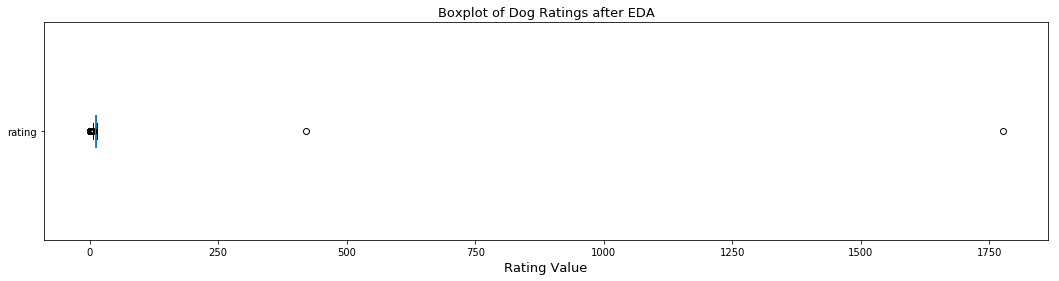

In [88]:
# Boxplot for the ratings
df_master[['rating']].plot(kind='box',vert=False, figsize=(18,4));

# chart labels
plt.title('Boxplot of Dog Ratings', fontsize=13);
plt.title('Boxplot of Dog Ratings after EDA', fontsize=13);
plt.xlabel('Rating Value', fontsize=13);

### After removing outliers, plot the boxplot once again.

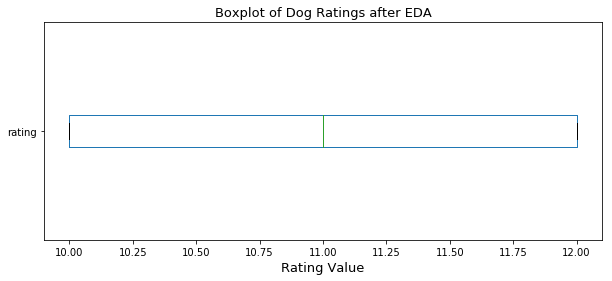

In [89]:
#Remove outlier using the 25th and 75th percentiles
df_master_EDA = df_master.query('rating >= 10 & rating <= 12')

#boxPlot chart for the modified data
df_master_EDA['rating'].plot(kind='box',vert=False, figsize=(10,4));

# chart labels
plt.title('Boxplot of Dog Ratings after EDA', fontsize=13);
plt.xlabel('Rating Value', fontsize=13);


### Relationship between ratings and retweet counts

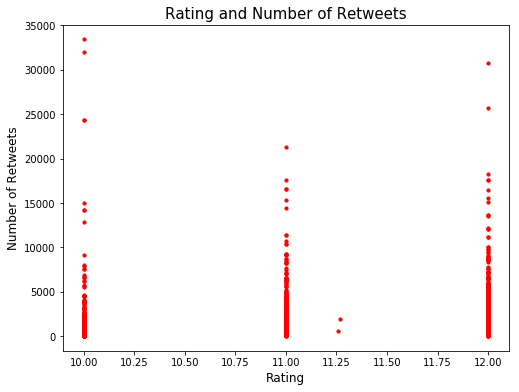

In [90]:
#Relationship between ratings and retweet counts
df_master_EDA.plot.scatter(x='rating',y='retweet_count',s=10,c='red', figsize=(8,6));


#chart labels
plt.xlabel('Rating', fontsize=12);
plt.ylabel('Number of Retweets', fontsize=12)
plt.title('Rating and Number of Retweets', fontsize=15);

### Favorite count and rating relationships

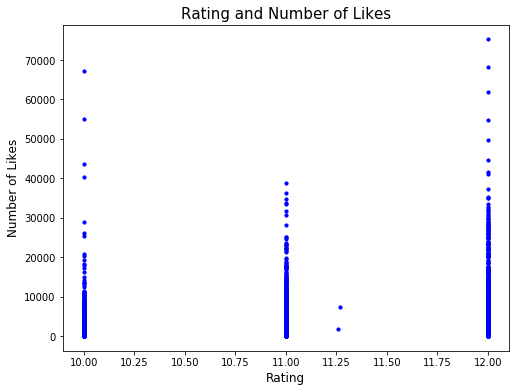

In [91]:
#Favorite count and rating relationships
df_master_EDA.plot.scatter(x='rating',y='favorite_count',s=10,c='blue',figsize=(8,6));

# chart labels
plt.xlabel('Rating', fontsize=12);
plt.ylabel('Number of Likes', fontsize=12)
plt.title('Rating and Number of Likes', fontsize=15);

### Relationship between favorite counts and retweet counts

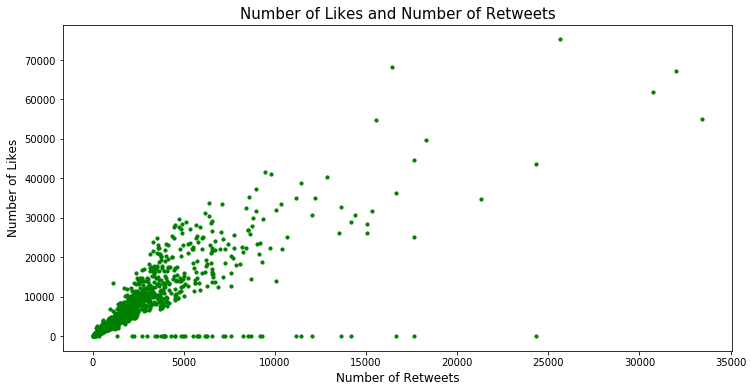

In [92]:
#Relationship between favorite counts and retweet counts
df_master_EDA.plot.scatter(x='retweet_count',y='favorite_count',s=10,c='green',figsize=(12,6));

# chart labels
plt.xlabel('Number of Retweets', fontsize=12);
plt.ylabel('Number of Likes', fontsize=12)
plt.title('Number of Likes and Number of Retweets', fontsize=15);

### the amount of images posted and the number of retweets

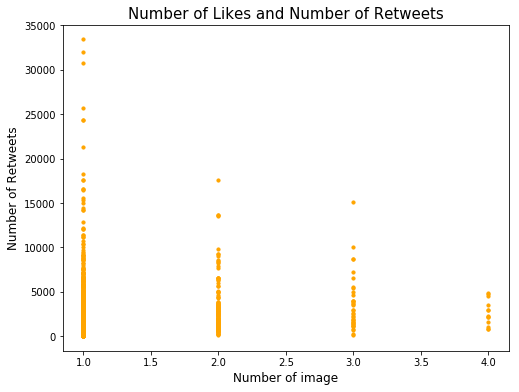

In [93]:
#the amount of images posted and the number of retweets
df_master_EDA.plot.scatter(x='img_num',y='retweet_count',s=10,c='orange', figsize=(8,6));

# chart labels
plt.xlabel('Number of image', fontsize=12);
plt.ylabel('Number of Retweets', fontsize=12)
plt.title('Number of Likes and Number of Retweets', fontsize=15);

### A bar chart that shows the amount of photos posted

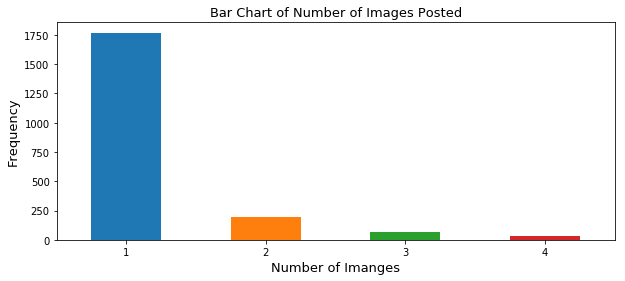

In [94]:
#A bar chart that shows the amount of photos posted
df_master['img_num'].value_counts().plot(kind='bar', figsize=(10,4));

# chart labels
plt.title('Bar Chart of Number of Images Posted', fontsize=13)
plt.xlabel('Number of Imanges',fontsize=13)
plt.ylabel('Frequency', fontsize=13);
plt.xticks(rotation=0);